In [1]:
!pip install pandas numpy scikit-learn tensorflow matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv(
    'AAPL_raw.csv',
    skiprows=3,
    names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'],
    index_col='Date',
    parse_dates=True
)

df = df.sort_index() 
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.261044,24.729267,23.821668,24.718171,212818400
2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000
2015-01-06,23.579794,23.839424,23.218085,23.641928,263188400
2015-01-07,23.910437,24.010294,23.677434,23.788387,160423600
2015-01-08,24.829134,24.886830,24.121251,24.238863,237458000


In [12]:
data = df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

sequence_length = 60


In [13]:
model = load_model('stock_lstm_model.h5')

In [14]:
n_days = 30

last_sequence = scaled_data[-sequence_length:]
future_predictions = []
current_sequence = last_sequence.copy()

for _ in range(n_days):
    pred = model.predict(current_sequence.reshape(1, sequence_length, 1), verbose=0)
    future_predictions.append(pred[0, 0])
    current_sequence = np.append(current_sequence[1:], pred[0, 0])


In [15]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_dates = pd.date_range(start=df.index[-1] + timedelta(days=1), periods=n_days)

future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted_Close'])

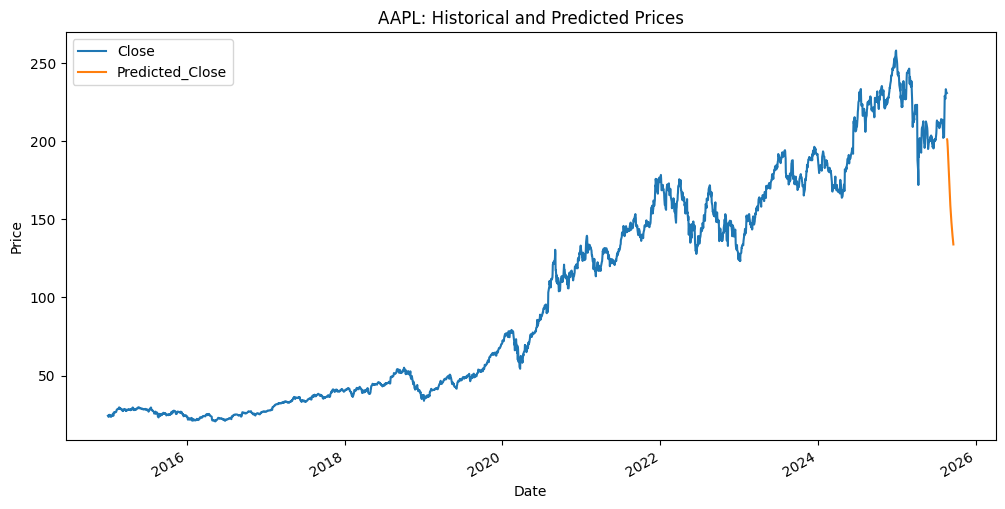

In [16]:
df_full = pd.concat([df[['Close']], future_df])
df_full.plot(figsize=(12,6))
plt.title('AAPL: Historical and Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
